In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.precision', 2)

In [4]:
df = pd.read_csv('/home/arunachal/Programming/scripts/telecom_churn.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [5]:
df['phone_number'] = df['phone_number'].str.replace("-","")

In [6]:
df['phone_number']= df['phone_number'].astype('int64')

In [7]:
df['churn'].value_counts(normalize=True)

False    0.86
True     0.14
Name: churn, dtype: float64

In [8]:
df.sort_values(by=['customer_service_calls', 'churn'], ascending=[False, False])

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
542,MN,152,415,4162778,yes,yes,20,237.5,120,40.38,...,94,21.54,265.2,80,11.93,14.2,3,3.83,9,True
2380,NJ,53,408,4166886,no,no,0,228.6,117,38.86,...,123,11.29,227.2,124,10.22,10.1,2,2.73,9,True
1912,NH,103,408,3711727,no,no,0,150.6,125,25.60,...,126,14.37,221.2,104,9.95,10.4,8,2.81,8,True
1502,SC,64,510,3338822,no,yes,40,210.0,116,35.70,...,89,19.78,168.8,94,7.60,5.9,4,1.59,8,False
332,AL,86,415,3803437,no,no,0,128.3,121,21.81,...,93,16.75,138.4,152,6.23,12.2,5,3.29,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,CA,127,510,3884331,no,no,0,107.9,128,18.34,...,77,15.90,218.5,95,9.83,0.0,0,0.00,0,False
3293,RI,95,408,4104882,no,no,0,160.0,133,27.20,...,98,18.30,188.9,87,8.50,9.1,4,2.46,0,False
3315,ME,149,415,3921376,no,yes,18,148.5,106,25.25,...,106,9.73,178.3,98,8.02,6.5,4,1.76,0,False
3316,MS,103,510,3906388,no,yes,29,164.1,111,27.90,...,96,18.62,220.3,108,9.91,12.3,9,3.32,0,False


In [9]:
df[df['churn'] == True].mean()

/tmp/ipykernel_4841/26685644.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['churn'] == True].mean()


account_length            1.03e+02
area_code                 4.38e+02
phone_number              3.75e+06
number_vmail_messages     5.12e+00
total_day_minutes         2.07e+02
total_day_calls           1.01e+02
total_day_charge          3.52e+01
total_eve_minutes         2.12e+02
total_eve_calls           1.01e+02
total_eve_charge          1.81e+01
total_night_minutes       2.05e+02
total_night_calls         1.00e+02
total_night_charge        9.24e+00
total_intl_minutes        1.07e+01
total_intl_calls          4.16e+00
total_intl_charge         2.89e+00
customer_service_calls    2.23e+00
churn                     1.00e+00
dtype: float64

In [10]:
df[df['churn'] == True].total_day_minutes.mean() 

206.91407867494814

In [11]:
df.total_day_minutes.mean() 

179.77509750975116

In [12]:
df[(df['churn'] == False) & df['international_plan'] == 'no']['total_intl_minutes'].max()

nan

In [13]:
df.sort_values(by=['churn', 'international_plan', 'total_intl_minutes'], ascending=[True, True, False])

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
314,ID,128,408,3595890,no,no,0,125.2,99,21.28,...,107,17.46,254.4,111,11.45,18.9,2,5.10,0,False
1816,OR,53,415,3861418,no,no,0,184.8,98,31.42,...,125,18.39,141.1,116,6.35,18.4,3,4.97,2,False
535,NE,194,408,4083532,no,no,0,48.4,101,8.23,...,138,23.89,218.5,87,9.83,18.2,1,4.91,1,False
2371,IL,100,415,4206121,no,no,0,191.9,95,32.62,...,101,17.08,271.9,74,12.24,18.2,3,4.91,1,False
367,MD,45,415,3501040,no,no,0,78.2,127,13.29,...,108,21.54,255.0,100,11.48,18.0,3,4.86,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2828,MS,123,415,3888948,yes,no,0,125.5,106,21.34,...,96,10.96,251.9,129,11.34,6.3,6,1.70,4,True
3157,AR,127,415,4163649,yes,no,0,143.2,60,24.34,...,159,15.26,171.8,122,7.73,6.2,4,1.67,4,True
416,DE,224,510,3616563,yes,no,0,171.5,99,29.16,...,103,13.60,212.4,102,9.56,5.0,2,1.35,1,True
2468,WV,152,510,3326139,yes,yes,41,146.8,128,24.96,...,96,24.28,213.6,80,9.61,4.3,2,1.16,1,True


In [14]:
df.loc[0:10, 'number_vmail_messages': 'total_day_charge']

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge
0,25,265.1,110,45.07
1,26,161.6,123,27.47
2,0,243.4,114,41.38
3,0,299.4,71,50.90
4,0,166.7,113,28.34
5,0,223.4,98,37.98
6,24,218.2,88,37.09
7,0,157.0,79,26.69
8,0,184.5,97,31.37
9,37,258.6,84,43.96


In [15]:
df[:1]

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False


In [16]:
df.apply(np.max)

state                          WY
account_length                243
area_code                     510
phone_number              4229964
international_plan            yes
voice_mail_plan               yes
number_vmail_messages          51
total_day_minutes           350.8
total_day_calls               165
total_day_charge            59.64
total_eve_minutes           363.7
total_eve_calls               170
total_eve_charge            30.91
total_night_minutes         395.0
total_night_calls             175
total_night_charge          17.77
total_intl_minutes           20.0
total_intl_calls               20
total_intl_charge             5.4
customer_service_calls          9
churn                        True
dtype: object

In [17]:
df['total_day_calls'].apply(np.max)

0       110
1       123
2       114
3        71
4       113
       ... 
3328     77
3329     57
3330    109
3331    105
3332    113
Name: total_day_calls, Length: 3333, dtype: int64

In [18]:
df[df['state'].apply(lambda state: state[0] == 'A')]

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
5,AL,118,510,3918027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
22,AZ,130,415,3581958,no,no,0,183.0,112,31.11,...,99,6.20,181.8,78,8.18,9.5,19,2.57,0,False
33,AZ,12,408,3601596,no,no,0,249.6,118,42.43,...,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
36,AK,36,408,3419764,no,yes,30,146.3,128,24.87,...,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False
38,AK,136,415,4021381,yes,yes,33,203.9,106,34.66,...,99,15.95,101.7,107,4.58,10.5,6,2.84,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,AR,76,408,3453614,no,no,0,107.3,140,18.24,...,133,20.25,271.8,116,12.23,10.0,3,2.70,4,True
3283,AK,99,510,4017334,no,no,0,238.4,96,40.53,...,130,20.95,198.4,117,8.93,12.4,4,3.35,3,False
3284,AZ,48,415,4093428,no,yes,27,141.1,109,23.99,...,94,19.10,174.3,122,7.84,13.2,2,3.56,1,False
3306,AL,106,408,4045283,no,yes,29,83.6,131,14.21,...,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False


In [19]:
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [20]:
d = {'no': False, 'yes': True}

df['international_plan'] = df['international_plan'].map(d)

In [21]:
df.replace({'voice_mail plan': d})

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,3824657,False,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,False,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,False,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,True,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,True,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,4144276,False,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,3703271,False,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,3288230,False,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,3646381,True,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [22]:
cols = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']

df.groupby(['churn'])[cols].describe(percentiles=[])


total_day_minutes                                   total_eve_minutes  \
                  count    mean    std  min    50%    max             count   
churn                                                                         
False            2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
True              483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         total_night_minutes                 \
         mean    std   min    50%    max               count    mean    std   
churn                                                                         
False  199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
True   212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
churn                       
False  23.2  200.25  395.0  
True   47.4  204.80  354.9

In [23]:
cols = ['account_length', 'customer_service_calls']

df.groupby(['churn'])[cols].describe(percentiles=[])


account_length                                   customer_service_calls  \
               count    mean    std  min    50%    max                  count   
churn                                                                           
False         2850.0  100.79  39.88  1.0  100.0  243.0                 2850.0   
True           483.0  102.66  39.47  1.0  103.0  225.0                  483.0   

                                  
       mean   std  min  50%  max  
churn                             
False  1.45  1.16  0.0  1.0  8.0  
True   2.23  1.85  0.0  2.0  9.0

In [24]:
pd.crosstab(df['churn'], df['customer_service_calls'], normalize=True)

customer_service_calls,0,1,2,3,4,5,6,7,8,9
churn,,,,,,,,,,
False,0.18,0.32,0.20,0.12,0.03,7.80e-03,2.40e-03,1.20e-03,3.00e-04,0.00e+00
True,0.03,0.04,0.03,0.01,0.02,1.20e-02,4.20e-03,1.50e-03,3.00e-04,6.00e-04


In [25]:
df.pivot_table(['account_length', 'customer_service_calls'], ['area_code'], aggfunc='mean')

,account_length,customer_service_calls
area_code,,
408,101.88,1.52
415,101.07,1.55
510,100.25,1.62


In [26]:
total_charge = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

In [27]:
df.insert(loc=len(df.columns), column = 'total_charge', value = total_charge)

In [28]:
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_charge
0,KS,128,415,3824657,False,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,72.86
1,OH,107,415,3717191,False,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,55.54
2,NJ,137,415,3581921,False,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,59.00
3,OH,84,408,3759999,True,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,65.02
4,OK,75,415,3306626,True,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,49.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,4144276,False,yes,36,156.2,77,26.55,...,18.32,279.1,83,12.56,9.9,6,2.67,2,False,57.43
3329,WV,68,415,3703271,False,no,0,231.1,57,39.29,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False,60.94
3330,RI,28,510,3288230,False,no,0,180.8,109,30.74,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False,63.93
3331,CT,184,510,3646381,True,no,0,213.8,105,36.35,...,13.57,139.2,137,6.26,5.0,10,1.35,2,False,56.18


In [29]:
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']

In [30]:
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_charge,total_calls
0,KS,128,415,3824657,False,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False,72.86,300
1,OH,107,415,3717191,False,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False,55.54,329
2,NJ,137,415,3581921,False,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False,59.00,328
3,OH,84,408,3759999,True,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False,65.02,248
4,OK,75,415,3306626,True,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False,49.36,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,4144276,False,yes,36,156.2,77,26.55,...,279.1,83,12.56,9.9,6,2.67,2,False,57.43,286
3329,WV,68,415,3703271,False,no,0,231.1,57,39.29,...,191.3,123,8.61,9.6,4,2.59,3,False,60.94,235
3330,RI,28,510,3288230,False,no,0,180.8,109,30.74,...,191.9,91,8.64,14.1,6,3.81,2,False,63.93,258
3331,CT,184,510,3646381,True,no,0,213.8,105,36.35,...,139.2,137,6.26,5.0,10,1.35,2,False,56.18,326


In [31]:
df.drop([1, 2]).head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_charge,total_calls
0,KS,128,415,3824657,False,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False,72.86,300
3,OH,84,408,3759999,True,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False,65.02,248
4,OK,75,415,3306626,True,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False,49.36,356
5,AL,118,510,3918027,True,no,0,223.4,98,37.98,...,203.9,118,9.18,6.3,6,1.70,0,False,65.91,317
6,MA,121,510,3559993,False,yes,24,218.2,88,37.09,...,212.6,118,9.57,7.5,7,2.03,3,False,76.28,314


In [32]:
df = df.replace({'voice_mail plan': d})

In [33]:
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_charge,total_calls
0,KS,128,415,3824657,False,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False,72.86,300
1,OH,107,415,3717191,False,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False,55.54,329
2,NJ,137,415,3581921,False,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False,59.00,328
3,OH,84,408,3759999,True,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False,65.02,248
4,OK,75,415,3306626,True,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False,49.36,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,4144276,False,yes,36,156.2,77,26.55,...,279.1,83,12.56,9.9,6,2.67,2,False,57.43,286
3329,WV,68,415,3703271,False,no,0,231.1,57,39.29,...,191.3,123,8.61,9.6,4,2.59,3,False,60.94,235
3330,RI,28,510,3288230,False,no,0,180.8,109,30.74,...,191.9,91,8.64,14.1,6,3.81,2,False,63.93,258
3331,CT,184,510,3646381,True,no,0,213.8,105,36.35,...,139.2,137,6.26,5.0,10,1.35,2,False,56.18,326


In [34]:
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']

In [35]:
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_charge,total_calls,total_minutes
0,KS,128,415,3824657,False,yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,False,72.86,300,707.2
1,OH,107,415,3717191,False,yes,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,False,55.54,329,611.5
2,NJ,137,415,3581921,False,no,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,False,59.00,328,527.2
3,OH,84,408,3759999,True,no,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,False,65.02,248,558.2
4,OK,75,415,3306626,True,no,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,False,49.36,356,501.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,4144276,False,yes,36,156.2,77,26.55,...,83,12.56,9.9,6,2.67,2,False,57.43,286,650.8
3329,WV,68,415,3703271,False,no,0,231.1,57,39.29,...,123,8.61,9.6,4,2.59,3,False,60.94,235,575.8
3330,RI,28,510,3288230,False,no,0,180.8,109,30.74,...,91,8.64,14.1,6,3.81,2,False,63.93,258,661.5
3331,CT,184,510,3646381,True,no,0,213.8,105,36.35,...,137,6.26,5.0,10,1.35,2,False,56.18,326,512.6


In [36]:
pd.crosstab(df['churn'], df['international_plan'], margins=True, normalize=True)

international_plan,False,True,All
churn,,,
False,0.8,0.06,0.86
True,0.1,0.04,0.14
All,0.9,0.10,1.00


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
%config InlineBackend.figure_format = 'retina'

<AxesSubplot:xlabel='international_plan', ylabel='count'>

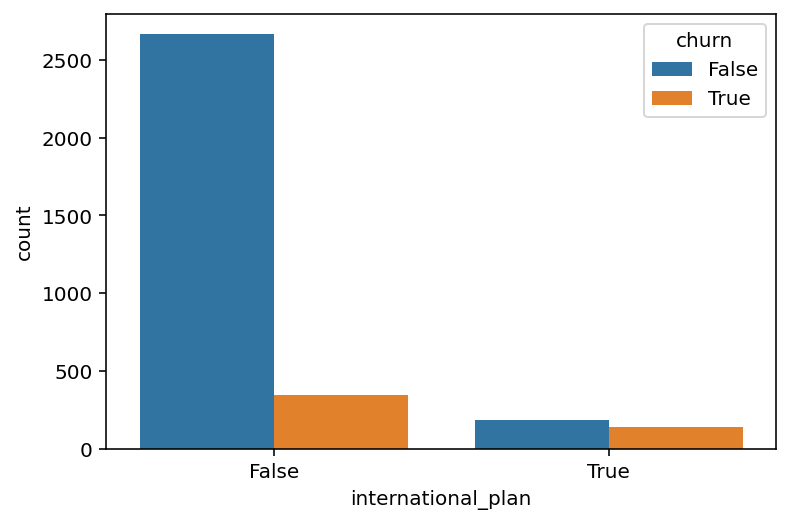

In [38]:
sns.countplot(x='international_plan', hue='churn', data=df)

With International Plan, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

In [39]:
pd.crosstab(df['churn'], df['customer_service_calls'], margins=True, normalize=True)

customer_service_calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
False,0.18,0.32,0.20,0.12,0.03,7.80e-03,2.40e-03,1.20e-03,3.00e-04,0.00e+00,0.86
True,0.03,0.04,0.03,0.01,0.02,1.20e-02,4.20e-03,1.50e-03,3.00e-04,6.00e-04,0.14
All,0.21,0.35,0.23,0.13,0.05,1.98e-02,6.60e-03,2.70e-03,6.00e-04,6.00e-04,1.00


<AxesSubplot:xlabel='customer_service_calls', ylabel='count'>

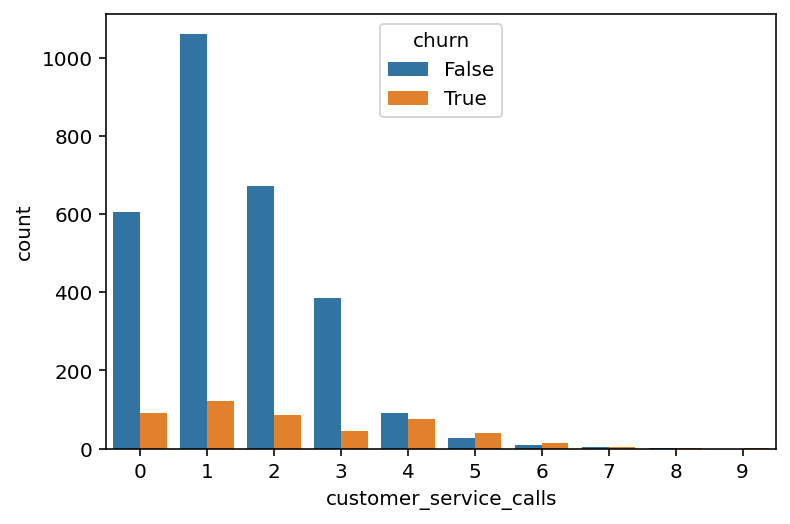

In [40]:
sns.countplot(x='customer_service_calls', hue='churn', data=df)

In [41]:
df['many_service_calls'] = (df['customer_service_calls'] > 3).astype('int')

In [42]:
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_charge,total_calls,total_minutes,many_service_calls
0,KS,128,415,3824657,False,yes,25,265.1,110,45.07,...,11.01,10.0,3,2.70,1,False,72.86,300,707.2,0
1,OH,107,415,3717191,False,yes,26,161.6,123,27.47,...,11.45,13.7,3,3.70,1,False,55.54,329,611.5,0
2,NJ,137,415,3581921,False,no,0,243.4,114,41.38,...,7.32,12.2,5,3.29,0,False,59.00,328,527.2,0
3,OH,84,408,3759999,True,no,0,299.4,71,50.90,...,8.86,6.6,7,1.78,2,False,65.02,248,558.2,0
4,OK,75,415,3306626,True,no,0,166.7,113,28.34,...,8.41,10.1,3,2.73,3,False,49.36,356,501.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,4144276,False,yes,36,156.2,77,26.55,...,12.56,9.9,6,2.67,2,False,57.43,286,650.8,0
3329,WV,68,415,3703271,False,no,0,231.1,57,39.29,...,8.61,9.6,4,2.59,3,False,60.94,235,575.8,0
3330,RI,28,510,3288230,False,no,0,180.8,109,30.74,...,8.64,14.1,6,3.81,2,False,63.93,258,661.5,0
3331,CT,184,510,3646381,True,no,0,213.8,105,36.35,...,6.26,5.0,10,1.35,2,False,56.18,326,512.6,0


In [43]:
pd.crosstab(df['many_service_calls'], df['churn'], margins=True, normalize=True)

churn,False,True,All
many_service_calls,,,
0,0.82,0.10,0.92
1,0.04,0.04,0.08
All,0.86,0.14,1.00


<AxesSubplot:xlabel='many_service_calls', ylabel='count'>

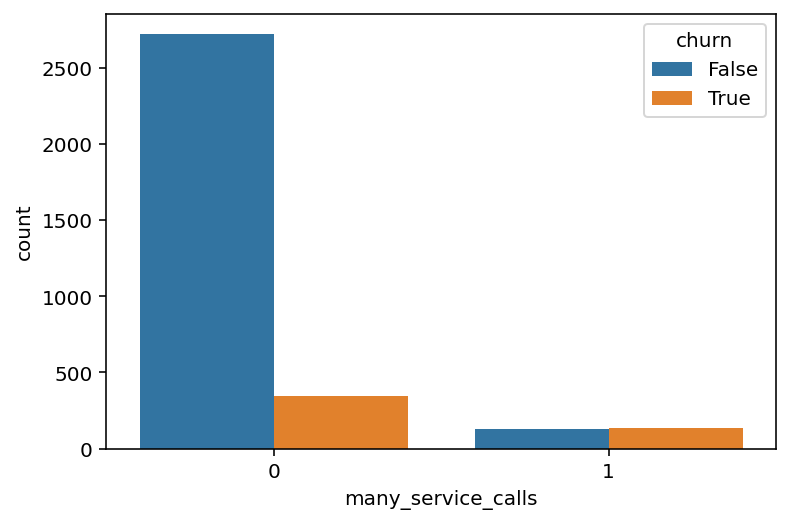

In [44]:
sns.countplot(x='many_service_calls', hue='churn', data=df)

In [45]:
pd.crosstab(df['many_service_calls'] & df['international_plan'], df['churn'], margins=True)

churn,False,True,All
row_0,,,
False,2841,464,3305
True,9,19,28
All,2850,483,3333


In [46]:
df['many_service_intl_plan'] = ((df['customer_service_calls'] > 3) & df['international_plan']).astype('int')

In [47]:
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_charge,total_calls,total_minutes,many_service_calls,many_service_intl_plan
0,KS,128,415,3824657,False,yes,25,265.1,110,45.07,...,10.0,3,2.70,1,False,72.86,300,707.2,0,0
1,OH,107,415,3717191,False,yes,26,161.6,123,27.47,...,13.7,3,3.70,1,False,55.54,329,611.5,0,0
2,NJ,137,415,3581921,False,no,0,243.4,114,41.38,...,12.2,5,3.29,0,False,59.00,328,527.2,0,0
3,OH,84,408,3759999,True,no,0,299.4,71,50.90,...,6.6,7,1.78,2,False,65.02,248,558.2,0,0
4,OK,75,415,3306626,True,no,0,166.7,113,28.34,...,10.1,3,2.73,3,False,49.36,356,501.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,4144276,False,yes,36,156.2,77,26.55,...,9.9,6,2.67,2,False,57.43,286,650.8,0,0
3329,WV,68,415,3703271,False,no,0,231.1,57,39.29,...,9.6,4,2.59,3,False,60.94,235,575.8,0,0
3330,RI,28,510,3288230,False,no,0,180.8,109,30.74,...,14.1,6,3.81,2,False,63.93,258,661.5,0,0
3331,CT,184,510,3646381,True,no,0,213.8,105,36.35,...,5.0,10,1.35,2,False,56.18,326,512.6,0,0


<AxesSubplot:xlabel='many_service_intl_plan', ylabel='count'>

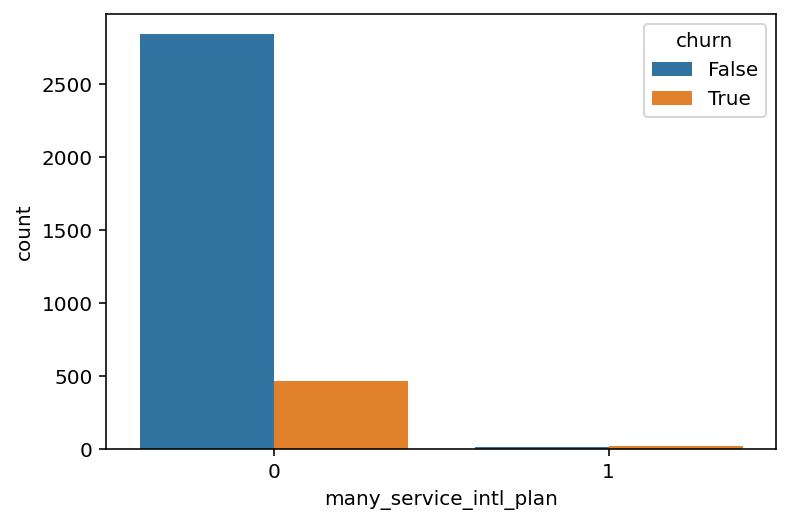

In [48]:
sns.countplot(x='many_service_intl_plan', hue='churn', data=df)

Predicting that a customer is not loyal (Churn=1) in the case when the number of calls to the service center is greater than 3 and the International Plan is added (and predicting Churn=0 otherwise), we might expect an accuracy of 85.8% (we are mistaken only 464 + 9 times).

The share of loyal clients in the sample is 85.5%. The most naive model that always predicts a "loyal customer" on such data will guess right in about 85.5% of all cases. That is, the proportion of correct answers (accuracy) of subsequent models should be no less than this number, and will hopefully be significantly higher;

In business applications of machine learning, they usually start with simple solutions and then experiment with more complex ones.

In [50]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

Data is not balanced; the two target classes, loyal and disloyal customers, are not represented equally in the dataset. This fact may imply some restrictions on measuring the classification performance, and, in the future, we may want to additionally penalize our model errors in predicting the minority "Churn" class.